# Criptografía

In [ ]:
# pip install unidecode

## Sustitución monoalfabetica

In [ ]:
import string

from unidecode import unidecode

letters = list(string.ascii_letters[:14] + 'ñ' + string.ascii_letters[14:26])
total_of_letters = len(letters)
numbers = [i for i in range(total_of_letters)]
letters_to_numbers = dict(zip(letters, numbers))
numbers_to_letters = dict(zip(numbers, letters))


def gcde(a, b):
       if a == 0:
           return (b, 0, 1)
       else:
           g, y, x = gcde(b % a, a)
           return (g, x - (b // a) * y, y)


def modinv(a, mod):
       g, x, y = gcde(a, mod)
       if g != 1:
           return 0
       else:
           return x % mod


def encrypt_plain_text(plain_text, a, n):
    plain_text = unidecode(plain_text).lower()
    plain_text_to_numbers = [str( (a * letters_to_numbers.get(character_, character_) +
                                      n) % total_of_letters )
                                    if character_ in letters else character_
                                    for character_ in list(plain_text)]
    cryptogram = "".join([numbers_to_letters.get(int(character_), character_)
                         if character_.isnumeric() else character_
                         for character_ in list(plain_text_to_numbers)])
    return "".join(plain_text_to_numbers), cryptogram


def desencrypt_cryptogram(cryptogram, a, n):
    cryptogram_to_numbers = [str(((letters_to_numbers.get(character_, character_) - n) * modinv(a, total_of_letters) % total_of_letters))
                                    if character_ in letters else character_ 
                                    for character_ in list(cryptogram)]
    plain_text = "".join([numbers_to_letters.get(int(character_), character_)
                         if character_.isnumeric() else character_
                         for character_ in list(cryptogram_to_numbers)])
    return "".join(cryptogram_to_numbers), plain_text

### Encriptar un mensaje con la congruencia lineal

$$C = a \cdot M + n\mod N$$

In [ ]:
encrypt_plain_text(plain_text='Hola mundó.', a=2, n=3)

('176253 018296.', 'qgyd arcjg.')

### Desencriptar un mensaje con la congruencia lineal

In [ ]:
desencrypt_cryptogram(cryptogram='qgyd arcjg.', a=2, n=3)

('715110 122113315.', 'hola mundo.')

## Análisis de Frecuencias

In [ ]:
import itertools as iter

from collections import Counter

In [ ]:
def try_swap(text, text_letter, possible_answers):
    permutations = [x for x in iter.permutations(possible_answers)]
    print(text)
    print(permutations)
    texts = []
    for possible_answer_ in permutations:
        text_ = text
        for i in range(len(text_letter)):    
            text_ = text_.replace(text_letter[i], possible_answer_[i])
            print(f"Replace: [{text_letter[i]}] --> [{possible_answer_[i]}]")
        texts.append(text_)
        print(f"{text_}\n")
    return texts

In [ ]:
%%html
<img src='https://espanolaldia.files.wordpress.com/2014/03/frecuencia-de-uso-de-las-letras-en-espac3b1ol.png?w=640'>

### Ver frecuencia de letras en un texto

In [ ]:
text = "olud hñ krulcrpwh gh dñhvld b dñ whufhu gld hp ñd odguxjd ññhjdudp ñdv wursdv dñlgdv txh shuolwludp vxshudu hñ pxohur gh vrñgdgrv gh odulr b prv gdud ylfwruld hñ fhvdu"
print([('Caracter', 'Frecuencia absoluta', 'Frecuentica relativa')])
frecuencia_del_texto = [(i[0], i[1], i[1]/len(text)) for i in Counter(text).most_common()]
frecuencia_del_texto


[('Caracter', 'Frecuencia absoluta', 'Frecuentica relativa')]


[(' ', 30, 0.17964071856287425),
 ('d', 22, 0.1317365269461078),
 ('h', 17, 0.10179640718562874),
 ('u', 16, 0.09580838323353294),
 ('ñ', 11, 0.0658682634730539),
 ('l', 10, 0.059880239520958084),
 ('r', 9, 0.05389221556886228),
 ('g', 9, 0.05389221556886228),
 ('v', 9, 0.05389221556886228),
 ('p', 6, 0.03592814371257485),
 ('o', 5, 0.029940119760479042),
 ('w', 5, 0.029940119760479042),
 ('x', 4, 0.023952095808383235),
 ('f', 3, 0.017964071856287425),
 ('s', 3, 0.017964071856287425),
 ('b', 2, 0.011976047904191617),
 ('j', 2, 0.011976047904191617),
 ('k', 1, 0.005988023952095809),
 ('c', 1, 0.005988023952095809),
 ('t', 1, 0.005988023952095809),
 ('y', 1, 0.005988023952095809)]

In [ ]:
ls_ = try_swap(text, ['d', 'h'], ['a', 'e'])

olud hñ krulcrpwh gh dñhvld b dñ whufhu gld hp ñd odguxjd ññhjdudp ñdv wursdv dñlgdv txh shuolwludp vxshudu hñ pxohur gh vrñgdgrv gh odulr b prv gdud ylfwruld hñ fhvdu
[('a', 'e'), ('e', 'a')]
Replace: [d] --> [a]
Replace: [h] --> [e]
olua eñ krulcrpwe ge añevla b añ weufeu gla ep ña oaguxja ññejauap ñav wursav añlgav txe seuolwluap vxseuau eñ pxoeur ge vrñgagrv ge oaulr b prv gaua ylfwrula eñ fevau

Replace: [d] --> [e]
Replace: [h] --> [a]
olue añ krulcrpwa ga eñavle b eñ waufau gle ap ñe oeguxje ññajeuep ñev wursev eñlgev txa sauolwluep vxsaueu añ pxoaur ga vrñgegrv ga oeulr b prv geue ylfwrule añ faveu



In [ ]:
#@title
Mensaje: mira el horizonte de alesia y al tercer dia en la madruga llegaran las tropas alidas que permitiran superar el numero de soldados de mario y nos dara victoria el cesar

## Steganografia

In [ ]:
# pip install stegano

In [265]:
import matplotlib.pyplot as plt
import skimage.io as sk
import numpy as np

from stegano import lsb
from PIL import Image
from matplotlib.pyplot import imshow

### Least significant bit

In [ ]:
%%html
<img src='https://miro.medium.com/max/700/1*HeqPeanxAKuHwFHIPev7nw.png'>

In [ ]:
%%html
<img src='https://1.bp.blogspot.com/-5mF61sCPL8U/WfWfU8UGBjI/AAAAAAAAIKs/1LLUXJtUvaE-A66v468c6xCMpZXY0XEIwCLcBGAs/s1600/Esteganograf%25C3%25ADa_5.png'>

In [212]:
filepath = "/content/gato.jpg"
image = sk.imread(filepath)

In [225]:
message = "I will be there but you can't find me even if I'm a very very very long sentence"
secret = lsb.hide(filepath, message)
fileoutput = "/content/gato_encoded_.jpg"
secret.save(fileoutput)

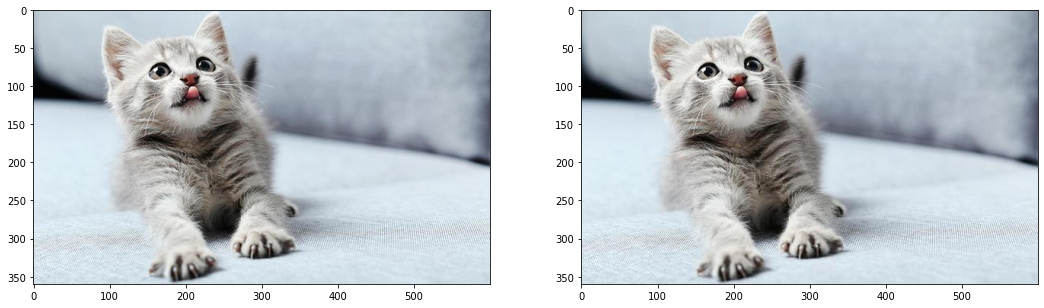

In [226]:
img1 = sk.imread(filepath)
img2 = sk.imread(fileoutput)

fig,ax = plt.subplots(1,2,figsize=(18,8))
    
ax[0].imshow(img1)
ax[1].imshow(img2)

In [216]:
img1[0]

array([[176, 189, 198],
       [177, 190, 199],
       [180, 193, 202],
       ...,
       [136, 148, 162],
       [135, 147, 161],
       [133, 145, 159]], dtype=uint8)

In [217]:
img2[0]

array([[176, 189, 198],
       [177, 190, 199],
       [180, 193, 202],
       ...,
       [137, 149, 163],
       [134, 146, 160],
       [132, 144, 158]], dtype=uint8)

In [227]:
lsb.reveal(secret)

"I will be there but you can't find me even if I'm a very very very long sentence"

In [301]:
def tranform_mess_to_bin(message):
    message = unidecode(message.replace(' ', '').lower())
    print(message)
    bin_mess = [format(letters_to_numbers.get(i, ''), '05b') for i in list(message)]
    print(bin_mess)
    return "".join(bin_mess)

In [253]:
format(5, '05b')

'00101'

In [258]:
format(1, '05b')

'00001'

In [257]:
format(5 & 1, '05b')

'00001'

In [302]:
i=0
message = 'Los alemanes planean invadir Francia preparen las tropas en la ciudad de Sédan'
data = tranform_mess_to_bin(message)
filename = '/content/mosters_inc_meme.png'
flag = False
with Image.open(filename) as img:
    width, height = img.size
    for x in range(0, width):
        for y in range(0, height):
            pixel = list(img.getpixel((x, y)))
            print(f"\n{pixel}")
            for n in range(0,3):
                if(i < len(data)):
                    print(f"{pixel[n]} --> {pixel[n] & ~1 | int(data[i])}")
                    print(f"{format(pixel[n], '05b')} --> {format(pixel[n] & ~1 | int(data[i]), '05b')}")
                    pixel[n] = pixel[n] & ~1 | int(data[i])
                    i+=1
                else:
                    flag = True
                    break
            img.putpixel((x,y), tuple(pixel))
            if flag: break
        if flag: break
    img.save("source_secret.png", "PNG")

losalemanesplaneaninvadirfranciapreparenlastropasenlaciudaddesedan
['01011', '01111', '10011', '00000', '01011', '00100', '01100', '00000', '01101', '00100', '10011', '10000', '01011', '00000', '01101', '00100', '00000', '01101', '01000', '01101', '10110', '00000', '00011', '01000', '10010', '00101', '10010', '00000', '01101', '00010', '01000', '00000', '10000', '10010', '00100', '10000', '00000', '10010', '00100', '01101', '01011', '00000', '10011', '10100', '10010', '01111', '10000', '00000', '10011', '00100', '01101', '01011', '00000', '00010', '01000', '10101', '00011', '00000', '00011', '00011', '00100', '10011', '00100', '00011', '00000', '01101']

[5, 5, 5]
5 --> 4
00101 --> 00100
5 --> 5
00101 --> 00101
5 --> 4
00101 --> 00100

[28, 28, 28]
28 --> 29
11100 --> 11101
28 --> 29
11100 --> 11101
28 --> 28
11100 --> 11100

[101, 101, 101]
101 --> 101
1100101 --> 1100101
101 --> 101
1100101 --> 1100101
101 --> 101
1100101 --> 1100101

[189, 189, 189]
189 --> 189
10111101 --> 10111101

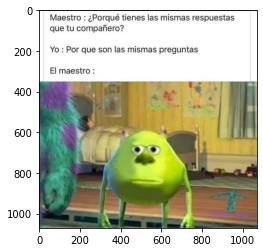

In [303]:
imshow(np.asarray(img))

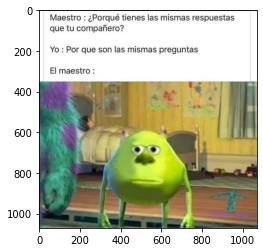

In [304]:
# img.show()
img2 = Image.open('/content/source_secret.png')
imshow(np.asarray(img2))

In [305]:
extracted_bin = []
i=0
flag = False
with Image.open("/content/source_secret.png") as img:
    width, height = img.size
    byte = []
    for x in range(0, width):
        for y in range(0, height):
            pixel = list(img.getpixel((x, y)))
            for n in range(0,3):
                if(i < len(data)):
                    extracted_bin.append(pixel[n]&1)
                    i+=1
                else:
                    flag = True
                    break
            if flag: break
        if flag: break
data_ = "".join([str(x) for x in extracted_bin])

In [306]:
data_

'010110111110011000000101100100011000000001101001001001110000010110000001101001000000001101010000110110110000000001101000100100010110010000000110100010010000000010000100100010010000000001001000100011010101100000100111010010010011111000000000100110010001101010110000000010010001010100011000000001100011001001001100100000110000001101'

In [309]:
result_lsb = [int(data_[i*5:(i+1)*5], 2) for i in range(len(data_)//5)]
print(result_lsb)

[11, 15, 19, 0, 11, 4, 12, 0, 13, 4, 19, 16, 11, 0, 13, 4, 0, 13, 8, 13, 22, 0, 3, 8, 18, 5, 18, 0, 13, 2, 8, 0, 16, 18, 4, 16, 0, 18, 4, 13, 11, 0, 19, 20, 18, 15, 16, 0, 19, 4, 13, 11, 0, 2, 8, 21, 3, 0, 3, 3, 4, 19, 4, 3, 0, 13]


In [308]:
"".join([numbers_to_letters.get(i) for i in result_lsb])

'losalemanesplaneaninvadirfranciapreparenlastropasenlaciudaddesedan'